# Question 1 Visualising nullclines
This notebook is a toy to mess around with nullclines in a 2D model

Import required libraries

In [1]:
import numpy as np
from scipy.integrate import solve_ivp  # Used to numerically solve the ODE
import matplotlib.pyplot as plt

In [2]:
# Library to allow for interactive plots
from IPython.display import display
from ipywidgets import interact, widgets, interactive

Define the function (right hand side of the eqution).

In [3]:
x_ini = np.array([1., 1.])

def lotka_volterra(t=0, x=x_ini, a=1, b=1, c=1, d=1):
    x_1, x_2 = x
    x_dot = np.empty_like(x)
    x_dot[0] = a * x_1 * (1 - x_1) - b * x_1 * x_2
    x_dot[1] = c * x_2 * (1 - x_2) - d * x_1 * x_2
    return x_dot

In [6]:
def lotka_volterra_jac(x=x_ini, a=1, b=1, c=1, d=1):
    x_1, x_2 = x
    jac = np.empty((2, 2))
    jac[0, 0] = a * (1 - 2 * x_1) - b * x_2
    jac[0, 1] = - b * x_1
    
    jac[1, 0] = - d * x_2
    jac[1, 1] = c * (1 - 2 * x_2) - d * x_1
    
    return jac

We define the zeros of the function above (found analytically but you could also do this numerically).

In [7]:
def lv_equilibria(a=1, b=1, c=1, d=1):
    # returned as a list of points (x_1, x_2)
    eq = [
        [0, 0],
        [1, 0],
        [0, 1],   
    ]
    if b * d - c * a != 0:
        eq.append([c * (b - a) / (b * d - c * a), a * (d - c) / (b * d - c * a)])
    return np.array(eq)

Determine their local stability using the jacobian

In [8]:
def lv_eq_stability_marker(eq=None, a=1, b=1, c=1, d=1):
    if eq is None:
        eq = lv_equilibria(a, b, c, d)
    stab = list()
    for e in eq:
        j_eq = lotka_volterra_jac(e, a, b, c, d)
        eig_vals = np.linalg.eigvals(j_eq)
        if isinstance(eig_vals[0], float):
            if np.sum(eig_vals < 0) == 2:
                stab.append('o')
            else:
                stab.append('x')
        else:
            stab.append('+')
    return stab

We define the nullclines (analytically found in class)

In [9]:
# define the values of x1 that we work over:
x1 = np.linspace(-0.1, 1.2, 100)

x_m = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x_m, x_m)

def nc1(x=x1, a=1, b=1, c=1, d=1):
    x2 = a / b * (1 - x1)
    return x2


def nc2(x=x1, a=1, b=1, c=1, d=1):
    x2 =  -d / c  * x1 + 1
    return x2

In [10]:
U, V = lotka_volterra(t=0, x=[X, Y], a=1, b=2, c=1, d=3)

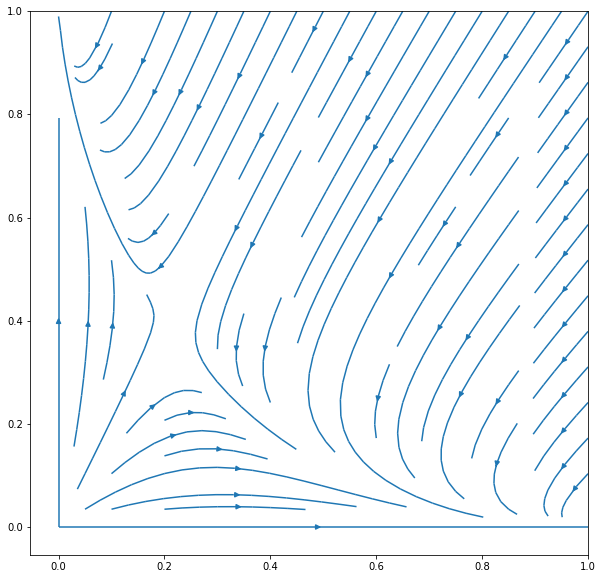

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.streamplot(X, Y, U, V, density=[0.7, 1])
plt.show()

Lets plot the solutions and nulclines for different values of $a,~b,~c,~d$

In [12]:
%matplotlib notebook

# Plotting Nullclines

<IPython.core.display.Javascript object>


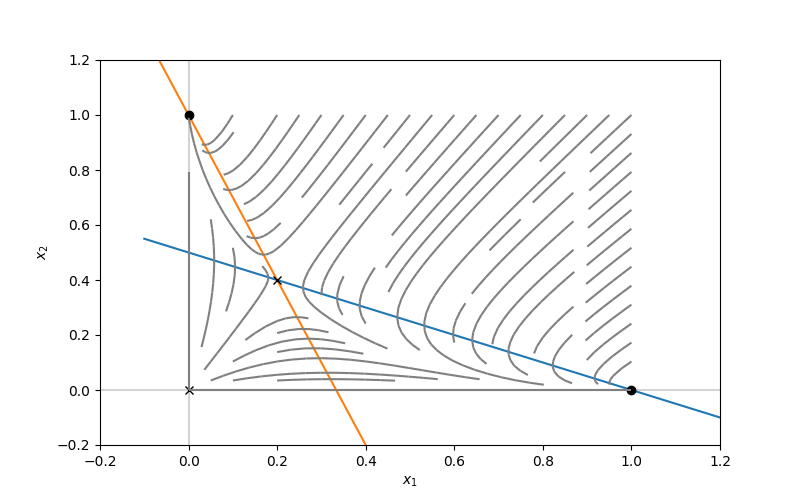

interactive(children=(FloatSlider(value=1.0, description='a', max=5.0, min=-5.0, step=0.01), FloatSlider(value…

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))

# background flow
U, V = lotka_volterra(t=0, x=[X, Y], a=1, b=2, c=1, d=3)
streamplot_set = ax.streamplot(X, Y, U, V, density=[0.7, 1], arrowsize=0, color='grey')

# set axis lims
ax.hlines(0, xmin=-0.2, xmax=3, color='lightgrey')
ax.vlines(0, ymin=-0.2, ymax=2, color='lightgrey')


line1, = ax.plot(x1, nc1(x=x1, a=1, b=2, c=1, d=3))  # Initial plot
line2, = ax.plot(x1, nc2(x=x1, a=1, b=2, c=1, d=3))  # Initial plot

# plot equilibria
eq = lv_equilibria(a=1, b=2, c=1, d=3)
marker = lv_eq_stability_marker(eq=eq, a=1, b=2, c=1, d=3)

points = list()
for e, m in zip(eq, marker):
    point1, = ax.plot(e[0], e[1], m, c='black')
    points.append(point1)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)


def update1(a, b, c, d):
    global streamplot_set
    if streamplot_set is not None:
        streamplot_set.lines.remove()
            
            
    U, V = lotka_volterra(t=0, x=[X, Y], a=a, b=b, c=c, d=d)
    streamplot_set = ax.streamplot(X, Y, U, V, density=[0.7, 1], arrowsize=0, color='grey')
    
    line1.set_ydata(nc1(a=a, b=b, c=c, d=d))
    line2.set_ydata(nc2(a=a, b=b, c=c, d=d))
    
    # draw equlibria
    eq = lv_equilibria(a=a, b=b, c=c, d=d)
    marker = lv_eq_stability_marker(eq=eq, a=a, b=b, c=c, d=d)
    
    for i, (e, m) in enumerate(zip(eq, marker)):
        points[i].set_xdata(e[0])
        points[i].set_ydata(e[1])
        points[i].set_marker(m)
        
    
    fig.canvas.draw_idle()
    
slid1 = interactive(update1, 
         a=widgets.FloatSlider(min=-5, max=5, step=0.01, value=1),
         b=widgets.FloatSlider(min=-5, max=5, step=0.01, value=2),
         c=widgets.FloatSlider(min=-5, max=5, step=0.01, value=1),
         d=widgets.FloatSlider(min=-5, max=5, step=0.01, value=3))
display(slid1)

<IPython.core.display.Javascript object>


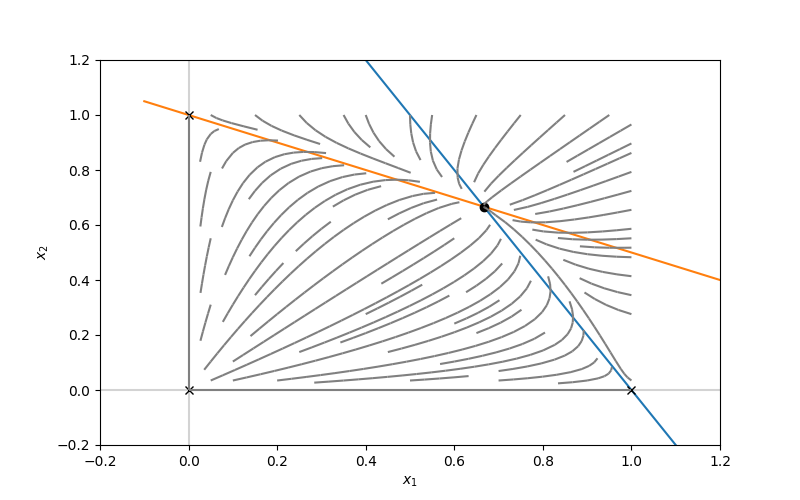

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.01), FloatSlider(value…

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))

# background flow
U, V = lotka_volterra(t=0, x=[X, Y], a=1, b=2, c=1, d=3)
streamplot_set = ax.streamplot(X, Y, U, V, density=[0.7, 1], arrowsize=0, color='grey')

# set axis lims
ax.hlines(0, xmin=-0.2, xmax=3, color='lightgrey')
ax.vlines(0, ymin=-0.2, ymax=2, color='lightgrey')


line1, = ax.plot(x1, nc1(x=x1, a=1, b=2, c=1, d=3))  # Initial plot
line2, = ax.plot(x1, nc2(x=x1, a=1, b=2, c=1, d=3))  # Initial plot

# plot equilibria
eq = lv_equilibria(a=1, b=2, c=1, d=3)
marker = lv_eq_stability_marker(eq=eq, a=1, b=2, c=1, d=3)

points = list()
for e, m in zip(eq, marker):
    point1, = ax.plot(e[0], e[1], m, c='black')
    points.append(point1)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)


def update1(a, b, c, d):
    global streamplot_set
    if streamplot_set is not None:
        streamplot_set.lines.remove()
            
            
    U, V = lotka_volterra(t=0, x=[X, Y], a=a, b=b, c=c, d=d)
    streamplot_set = ax.streamplot(X, Y, U, V, density=[0.7, 1], arrowsize=0, color='grey')
    
    line1.set_ydata(nc1(a=a, b=b, c=c, d=d))
    line2.set_ydata(nc2(a=a, b=b, c=c, d=d))
    
    # draw equlibria
    eq = lv_equilibria(a=a, b=b, c=c, d=d)
    marker = lv_eq_stability_marker(eq=eq, a=a, b=b, c=c, d=d)
    
    for i, (e, m) in enumerate(zip(eq, marker)):
        points[i].set_xdata(e[0])
        points[i].set_ydata(e[1])
        points[i].set_marker(m)
        
    
    fig.canvas.draw_idle()
    
slid1 = interactive(update1, 
         a=widgets.FloatSlider(min=-5, max=5, step=0.01, value=2),
         b=widgets.FloatSlider(min=-5, max=5, step=0.01, value=1),
         c=widgets.FloatSlider(min=-5, max=5, step=0.01, value=2),
         d=widgets.FloatSlider(min=-5, max=5, step=0.01, value=1))
display(slid1)

Above, dots show stable solutions, crosses unstable solutions, and '+' shows centres.

We now define $\alpha=a/b$ and $\gamma=c/d$ to make the analysis easier

<IPython.core.display.Javascript object>


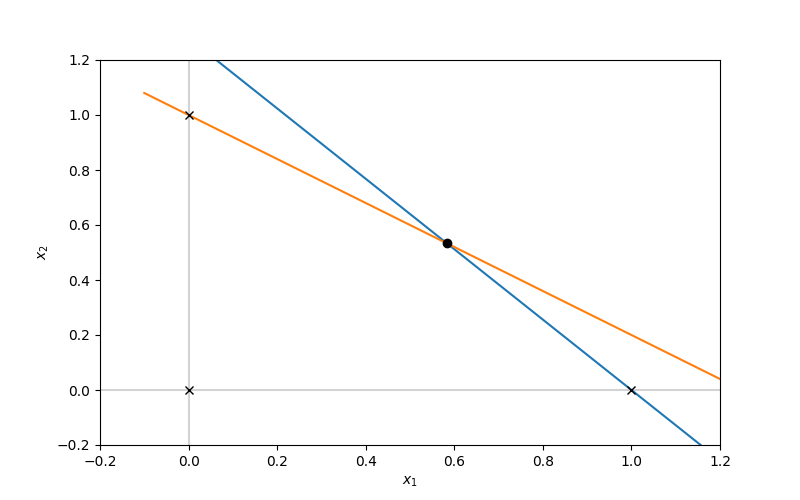

interactive(children=(FloatSlider(value=0.5, description='alpha', max=2.0, step=0.01), FloatSlider(value=0.5, …

In [22]:
# fixing b and d
b, d = 1, 3

fig, ax = plt.subplots(figsize=(8, 5))

# set axis lims
ax.hlines(0, xmin=-0.2, xmax=3, color='lightgrey')
ax.vlines(0, ymin=-0.2, ymax=2, color='lightgrey')


line1, = ax.plot(x1, nc1(x=x1, a=1, b=2, c=1, d=3))  # Initial plot
line2, = ax.plot(x1, nc2(x=x1, a=1, b=2, c=1, d=3))  # Initial plot

# plot equilibria
eq = lv_equilibria(a=1, b=2, c=1, d=3)
marker = lv_eq_stability_marker(eq=eq, a=1, b=2, c=1, d=3)

points = list()
for e, m in zip(eq, marker):
    point1, = ax.plot(e[0], e[1], m, c='black')
    points.append(point1)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)


def update1(alpha, gamma):
    a = alpha * b
    c = gamma * d
    line1.set_ydata(nc1(a=a, b=b, c=c, d=d))
    line2.set_ydata(nc2(a=a, b=b, c=c, d=d))
    
    # draw equlibria
    eq = lv_equilibria(a=a, b=b, c=c, d=d)
    marker = lv_eq_stability_marker(eq=eq, a=a, b=b, c=c, d=d)
    
    for i, (e, m) in enumerate(zip(eq, marker)):
        points[i].set_xdata(e[0])
        points[i].set_ydata(e[1])
        points[i].set_marker(m)
        
    
    fig.canvas.draw_idle()
    
slid1 = interactive(update1, 
         alpha=widgets.FloatSlider(min=0, max=2, step=0.01, value=0.5),
         gamma=widgets.FloatSlider(min=0, max=2, step=0.01, value=0.5))
display(slid1)